# Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from utils.experiments import get_bh_integral
from pathlib import Path


plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    #"font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

DATA_SOURCE = Path.cwd().parent / 'data' / 'input' / 'raw'
PROC_SOURCE = DATA_SOURCE.parent/ "processed"

B_COLS = [f"B_t_{k}" for k in range(1024)]
H_COLS = [f"H_t_{k}" for k in range(1024)]

In [2]:
ds = pd.read_pickle(PROC_SOURCE / "ten_materials.pkl.gz")
full_b, full_h = ds.loc[:, B_COLS].to_numpy(), ds.loc[:, H_COLS].to_numpy()

## Stats

In [3]:
ds.shape

(186747, 2052)

In [4]:
[c for c in ds.columns if not c.startswith(("B_t", "H_t"))]

['freq', 'temp', 'ploss', 'material']

In [5]:
counts_per_mat = ds.loc[:, ["material", 'freq']].groupby("material").agg(["count",]).rename(columns={'freq': ''})
counts_per_mat.columns = ['count']
counts_per_mat = counts_per_mat.sort_values('count', ascending=False).T
counts_per_mat

material   3C90    N87   3C94     77    N27     78   N30   N49   3E6   3F4
count     40712  40615  40067  11443  11395  11379  8977  8601  6995  6563

186747 samples


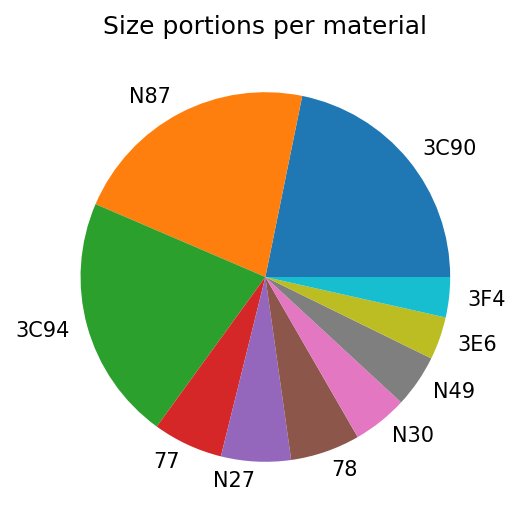

In [6]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
ax.pie(counts_per_mat.to_numpy().ravel(), labels=counts_per_mat.T.index.tolist())
ax.set_title("Size portions per material")
print(len(ds), 'samples')

## Distributions

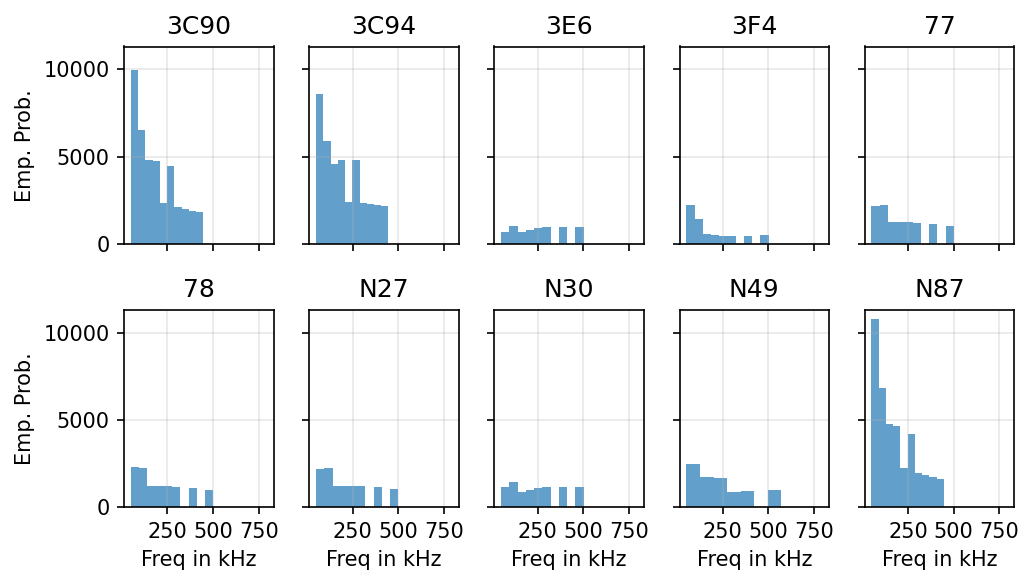

In [7]:
# Histogram of Frequency
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(mat_df.freq*1e-3, alpha=.7)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("Freq in kHz")
fig.tight_layout()

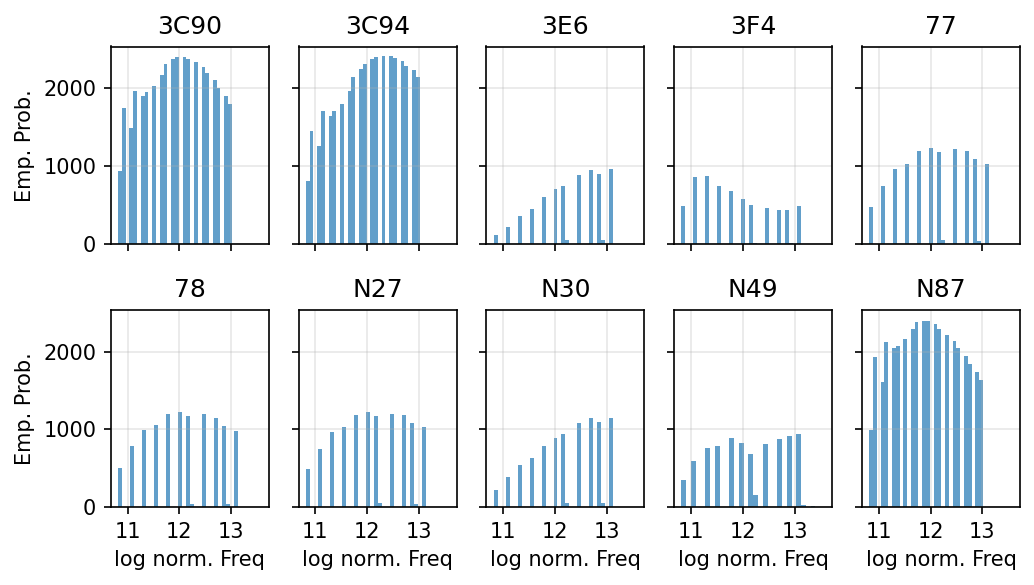

In [8]:
# Histogram of log of normalized frequency
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(np.log(mat_df.freq), alpha=.7, bins=30)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("log norm. Freq")
fig.tight_layout()

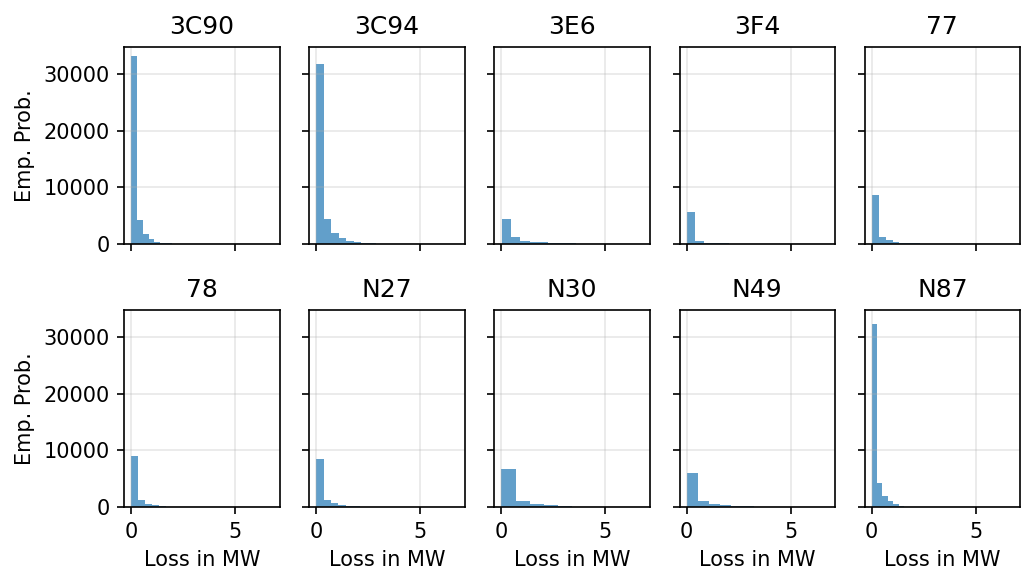

In [9]:
# Histogram of loss
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(mat_df.ploss*1e-6, alpha=.7)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("Loss in MW")
fig.tight_layout()

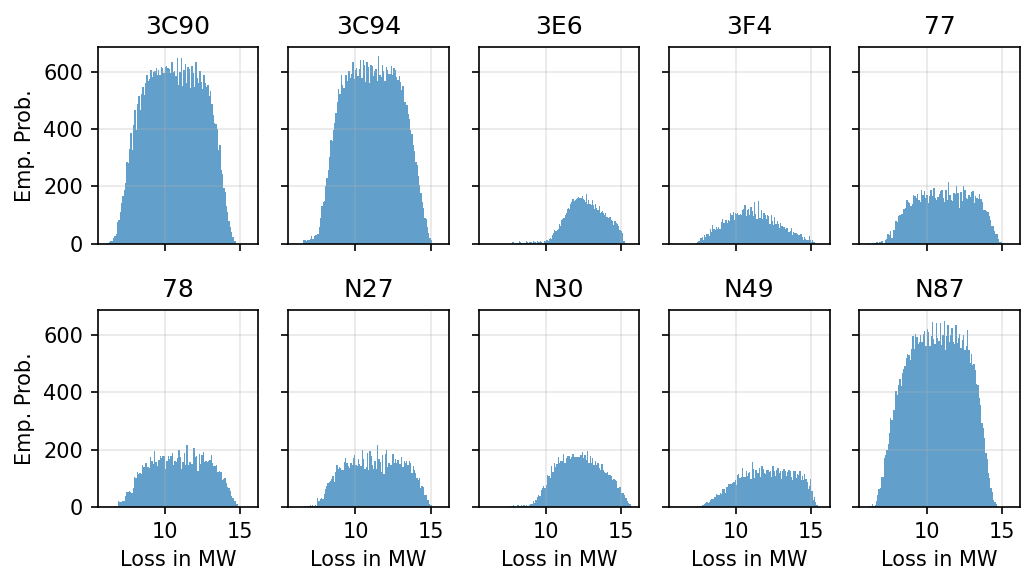

In [10]:
# Histogram of log loss
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(np.log(mat_df.ploss), alpha=.7, bins=100)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("Loss in MW")
fig.tight_layout()

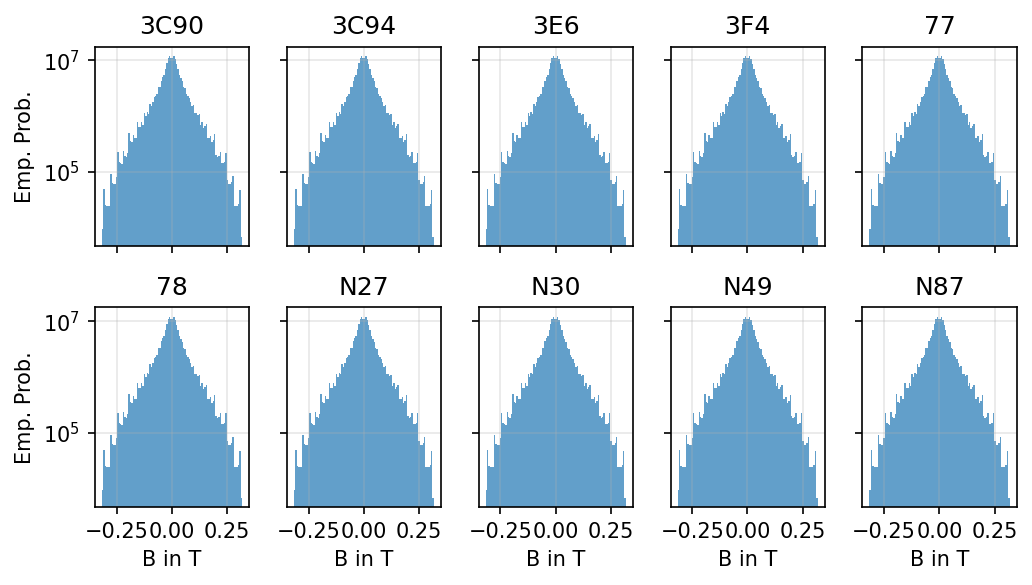

In [11]:
# Histogram of B curves
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(np.sinh(1*np.arcsinh(full_b.ravel())), alpha=.7, bins=100, log=True)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("B in T")
fig.tight_layout()

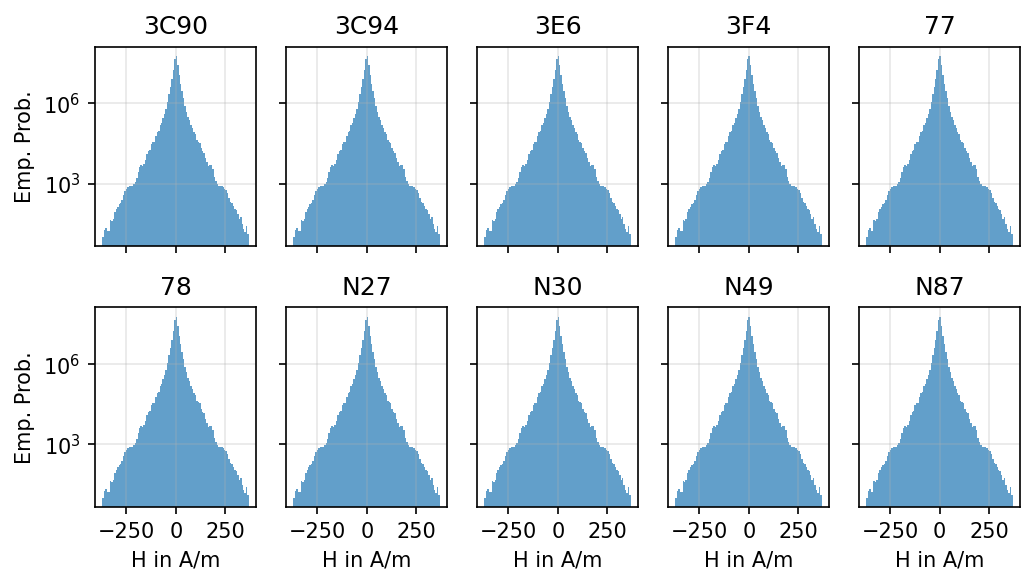

In [12]:
# Histogram of H curves
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.hist(full_h.ravel(), alpha=.7, bins=100, log=True)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Emp. Prob.")
axes[1, 0].set_ylabel("Emp. Prob.")
for ax in axes[-1, :]:
    ax.set_xlabel("H in A/m")
fig.tight_layout()

### 2way scatter plots

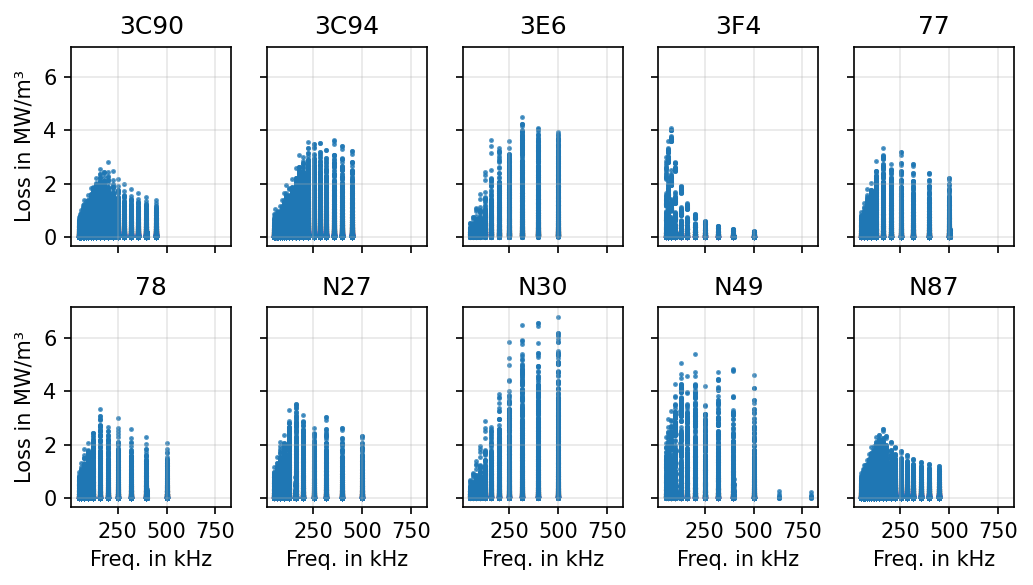

In [13]:
# 2-way scatters
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.scatter(mat_df.freq/1000, mat_df.ploss*1e-6, alpha=.7, s=2.0)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Loss in MW/m³")
axes[1, 0].set_ylabel("Loss in MW/m³")
for ax in axes[-1, :]:
    ax.set_xlabel("Freq. in kHz")
fig.tight_layout()

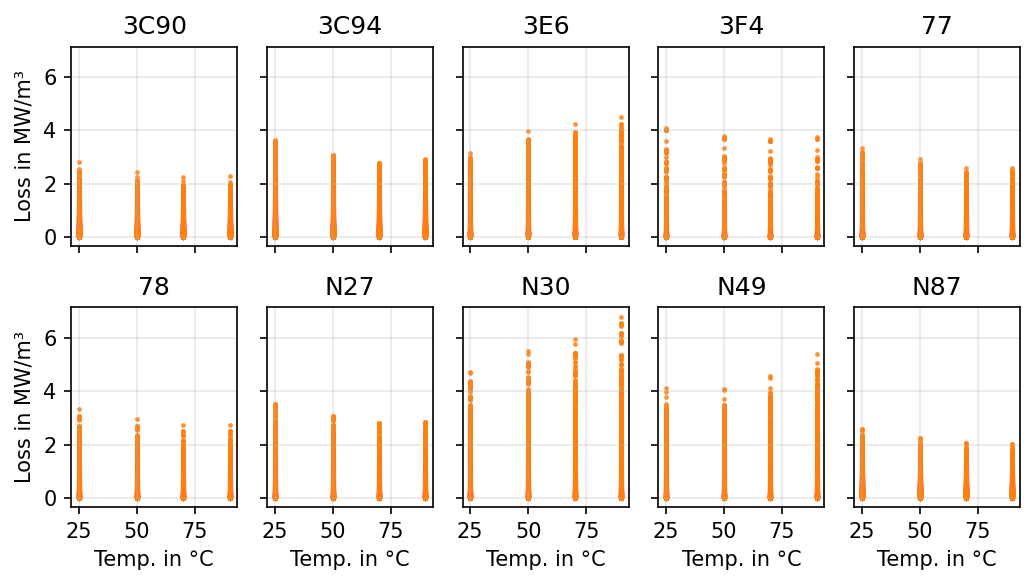

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.scatter(mat_df.temp, mat_df.ploss*1e-6, alpha=.7, s=2.0, color='tab:orange')
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Loss in MW/m³")
axes[1, 0].set_ylabel("Loss in MW/m³")
for ax in axes[-1, :]:
    ax.set_xlabel("Temp. in °C")
fig.tight_layout()

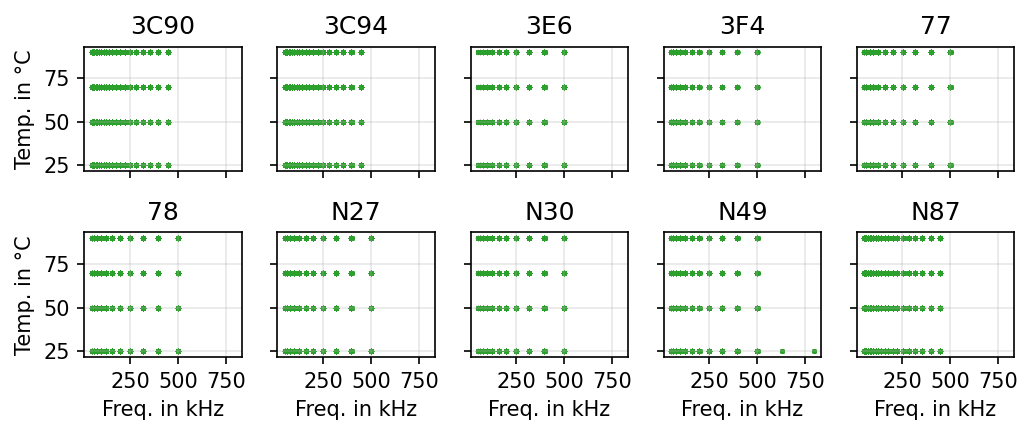

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 3))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    ax.scatter(mat_df.freq*1e-3, mat_df.temp, alpha=.7, s=2.0, color='tab:green')
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Temp. in °C")
axes[1, 0].set_ylabel("Temp. in °C")
for ax in axes[-1, :]:
    ax.set_xlabel("Freq. in kHz")
fig.tight_layout()

## Visualize B-H-Curves

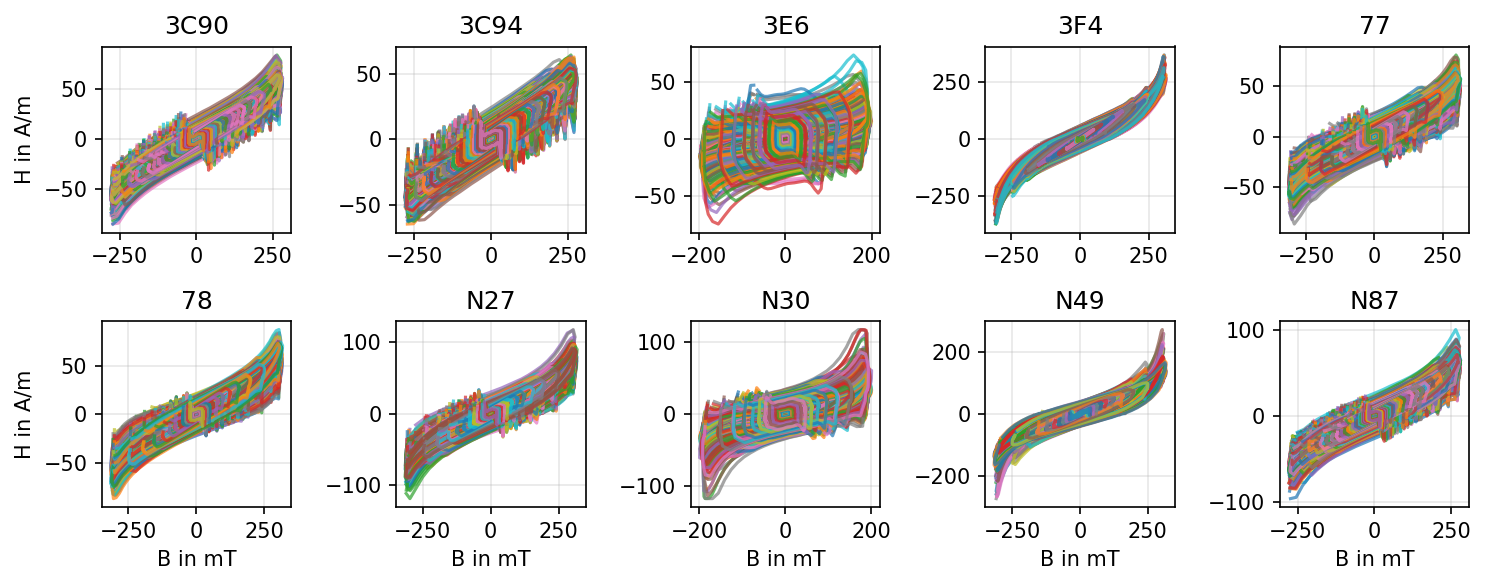

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=False, sharey=False, figsize=(10, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b, h = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024, 4)]].to_numpy(), mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024, 4)]].to_numpy()
    ax.plot(b.T*1000, h.T, alpha=.7)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("H in A/m")
axes[1, 0].set_ylabel("H in A/m")
for ax in axes[-1, :]:
    ax.set_xlabel("B in mT")
fig.tight_layout()

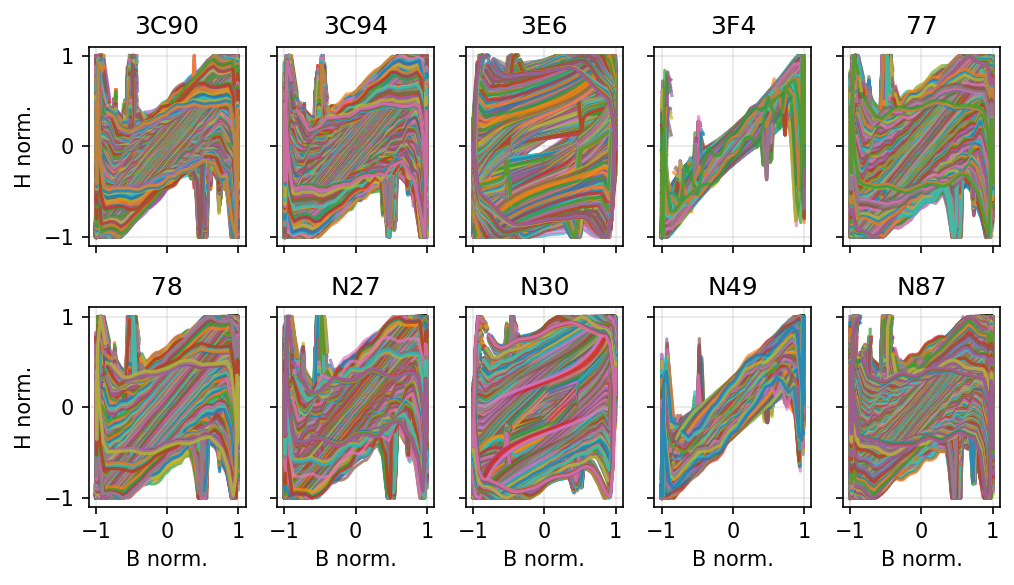

In [17]:
# BH curves normalized on maximum amplitude
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b, h = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024, 4)]].to_numpy(), mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024, 4)]].to_numpy()
    ax.plot((b/np.abs(b).max(axis=1).reshape(-1, 1)).T, (h/np.abs(h).max(axis=1).reshape(-1, 1)).T, alpha=.7)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("H norm.")
axes[1, 0].set_ylabel("H norm.")
for ax in axes[-1, :]:
    ax.set_xlabel("B norm.")
fig.tight_layout()

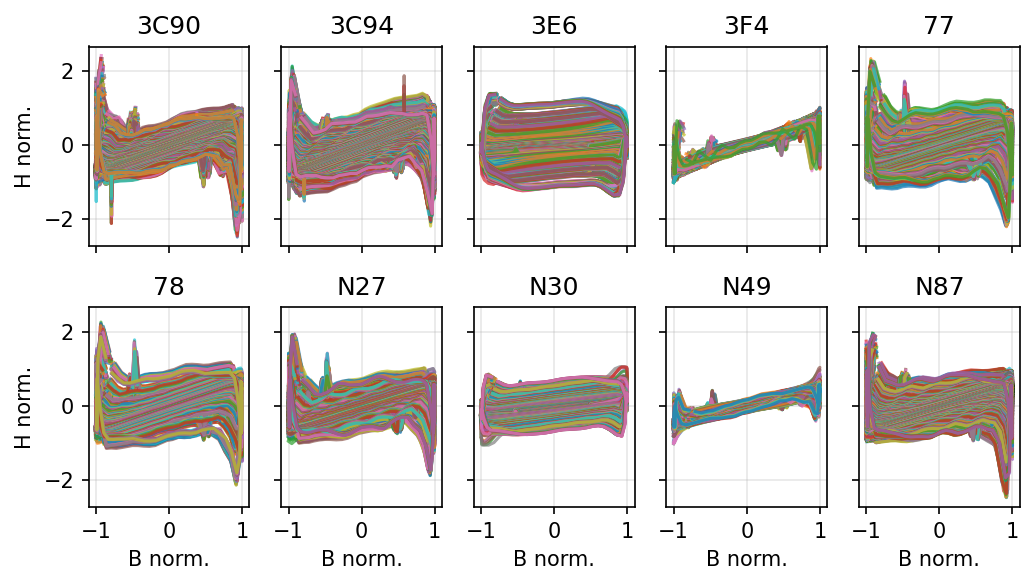

In [18]:
# BH curves normalized on maximum amplitude per profile as estimated from B curve
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b, h = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024, 4)]].to_numpy(), mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024, 4)]].to_numpy()
    ax.plot((b/np.abs(b).max(axis=1).reshape(-1, 1)).T, 
            (h/(np.abs(h).max() * np.abs(b).max(axis=1).reshape(-1,1)/np.abs(b).max())).T,
              alpha=.7)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("H norm.")
axes[1, 0].set_ylabel("H norm.")
for ax in axes[-1, :]:
    ax.set_xlabel("B norm.")
fig.tight_layout()

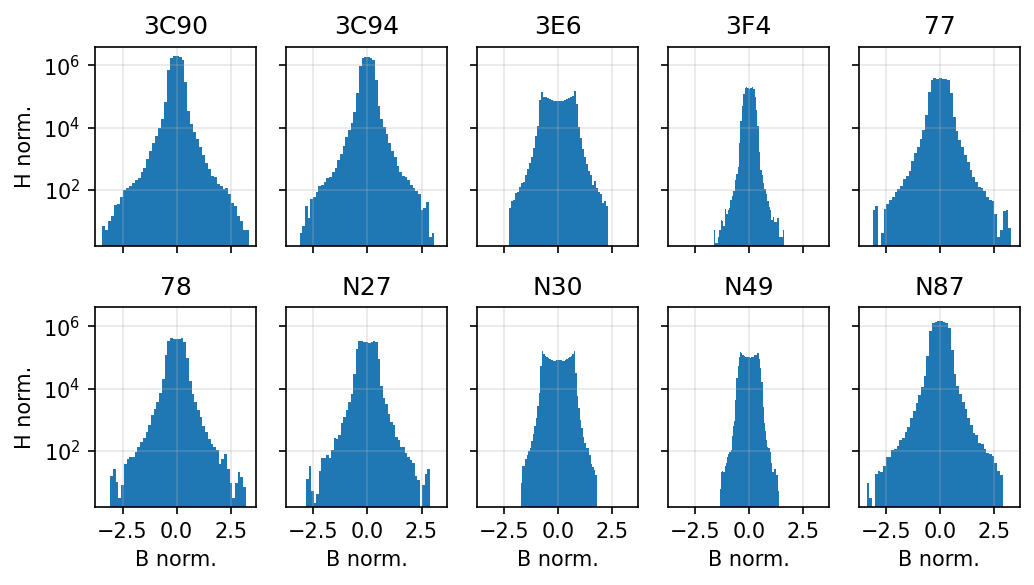

In [19]:
# how do differences H-B scatter per material?
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b, h = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024, 4)]].to_numpy(), mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024, 4)]].to_numpy()
    ax.hist(((h/(np.abs(h).max() * np.abs(b).max(axis=1).reshape(-1,1)/np.abs(b).max())).T - (b/np.abs(b).max(axis=1).reshape(-1, 1)).T).ravel(),
            bins=50)
    ax.set_title(mat_lbl)
    ax.set_yscale('log')
axes[0, 0].set_ylabel("H norm.")
axes[1, 0].set_ylabel("H norm.")
for ax in axes[-1, :]:
    ax.set_xlabel("B norm.")
fig.tight_layout()

## Distributions (2)
Consider B_max and H_max

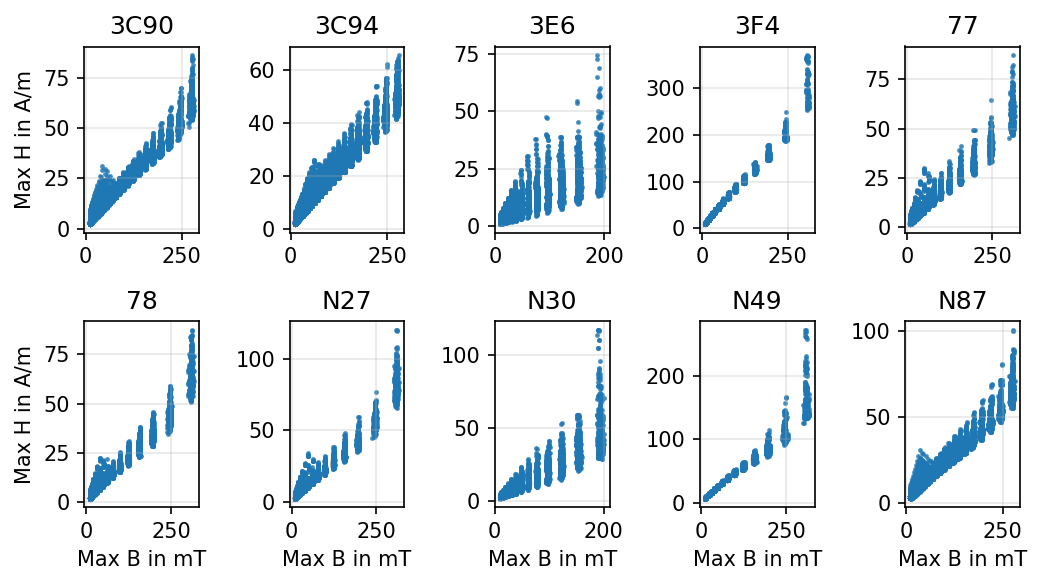

In [20]:
# Max H over B Max
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=False, sharey=False, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b, h = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024)]].to_numpy(), mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024)]].to_numpy()
    bmax = np.max(np.abs(b), axis=1)
    hmax = np.max(np.abs(h), axis=1)
    ax.scatter(bmax*1000, hmax, alpha=.7, s=2.0)
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Max H in A/m")
axes[1, 0].set_ylabel("Max H in A/m")
for ax in axes[-1, :]:
    ax.set_xlabel("Max B in mT")
fig.tight_layout()

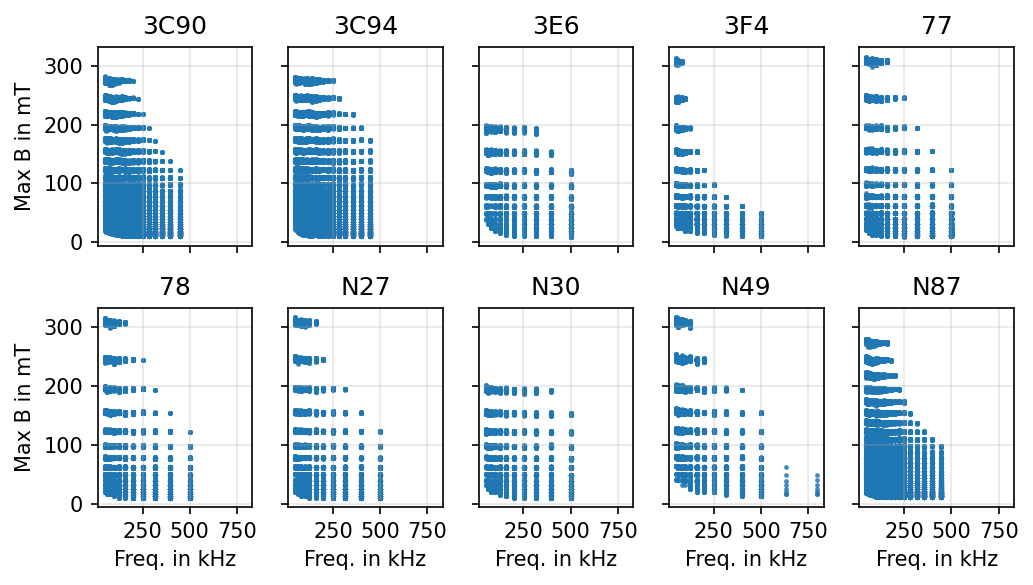

In [21]:
# max B over Frequency
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    b = mat_df.loc[:, [f"B_t_{k}" for k in range(0,1024)]].to_numpy() #, mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024)]].to_numpy()
    bmax = np.max(np.abs(b), axis=1)
    #hmax = np.max(np.abs(h), axis=1)
    #ax.scatter(mat_df.freq*1e3, hmax, alpha=.7, s=2.0, label='H')
    ax.scatter(mat_df.freq*1e-3, bmax*1000, alpha=.7, s=2.0, label='B', )
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Max B in mT")
axes[1, 0].set_ylabel("Max B in mT")
for ax in axes[-1, :]:
    ax.set_xlabel("Freq. in kHz")
fig.tight_layout()

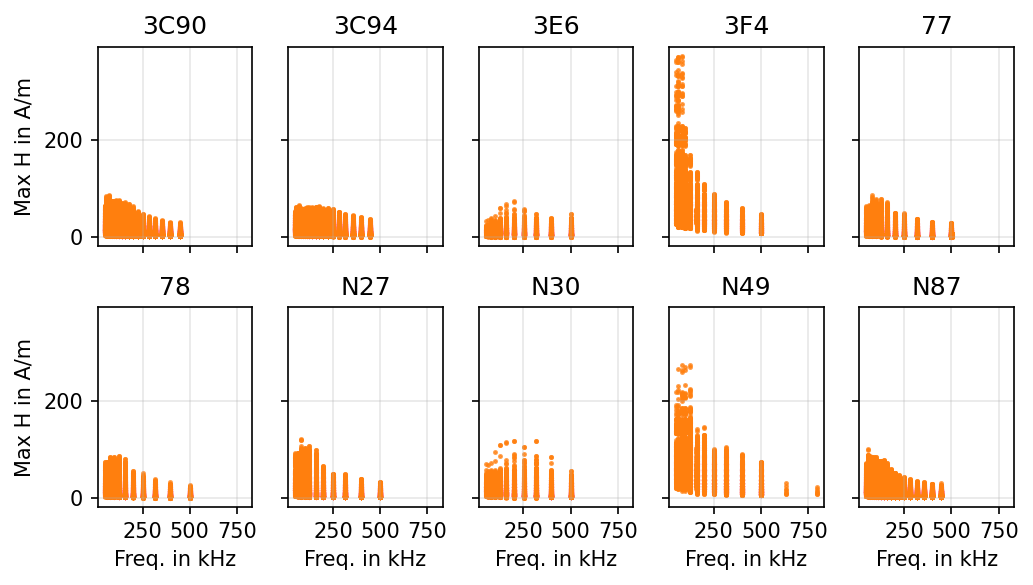

In [22]:
# max H over Frequency
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    h = mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024)]].to_numpy()
    
    hmax = np.max(np.abs(h), axis=1)
    ax.scatter(mat_df.freq*1e-3, hmax, alpha=.7, s=2.0, label='H', color='tab:orange')
    
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Max H in A/m")
axes[1, 0].set_ylabel("Max H in A/m")
for ax in axes[-1, :]:
    ax.set_xlabel("Freq. in kHz")
fig.tight_layout()

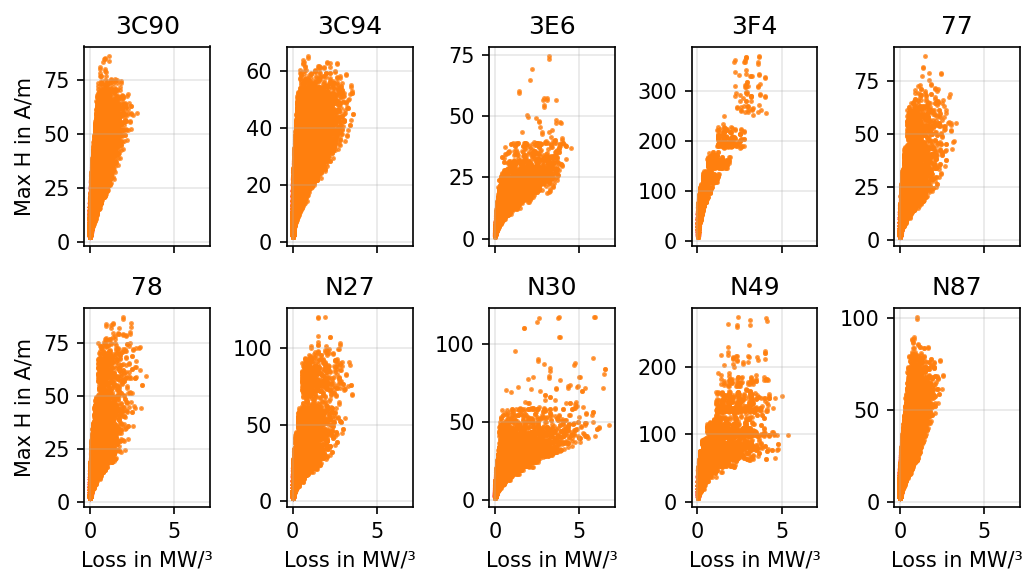

In [23]:
# max H over power loss
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=False, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    h = mat_df.loc[:, [f"H_t_{k}" for k in range(0,1024)]].to_numpy()
    
    hmax = np.max(np.abs(h), axis=1)
    ax.scatter(mat_df.ploss*1e-6, hmax, alpha=.7, s=2.0, label='H', color='tab:orange')
    
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("Max H in A/m")
axes[1, 0].set_ylabel("Max H in A/m")
for ax in axes[-1, :]:
    ax.set_xlabel("Loss in MW/³")
fig.tight_layout()

## Estimate waveforms

waveform
0    116060
1     13920
2     49262
3      7505
Name: count, dtype: int64


[]

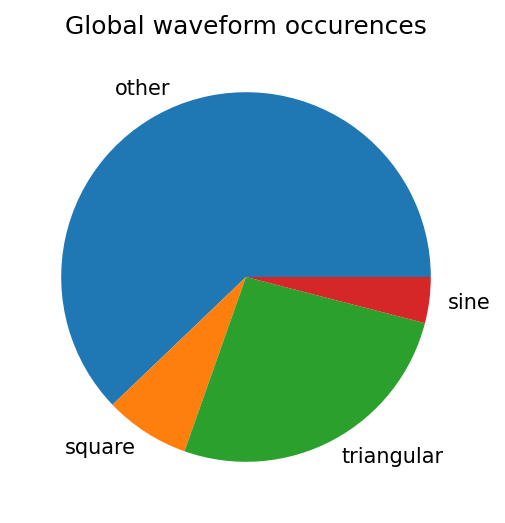

In [24]:
from utils.experiments import bool_filter_sine, bool_filter_triangular, get_waveform_est
t = np.arange(1024)
template_lbls = ['other', 'square', 'triangular', 'sine']

ds["waveform"] = get_waveform_est(full_b)
counts_per_waveform = ds['waveform'].value_counts().sort_index()
print(counts_per_waveform)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
ax.pie(counts_per_waveform.to_numpy().ravel(), labels=template_lbls)
ax.set_title("Global waveform occurences")
plt.plot()

[]

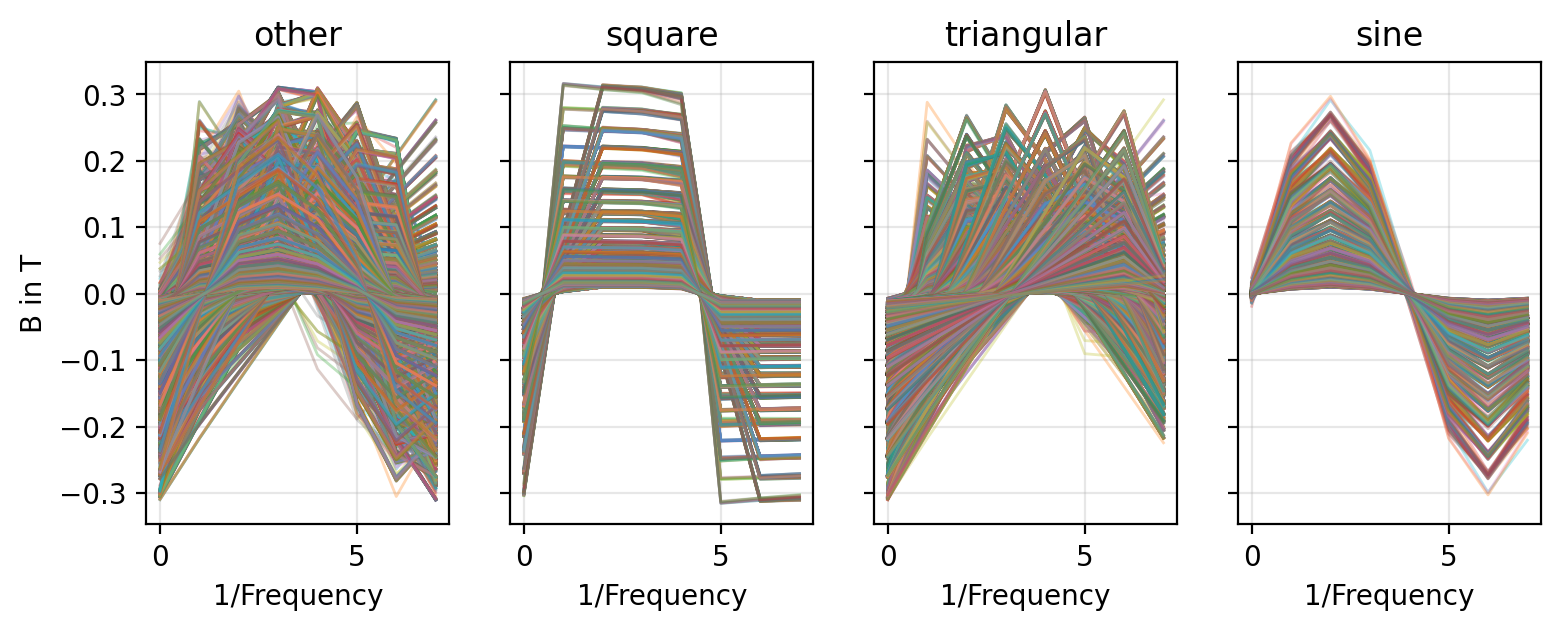

In [25]:
fig, axes = plt.subplots(1, len(template_lbls), dpi=200, figsize=(9, 3), sharex=True, sharey=True)

doi = ds
doi_b = full_b[:, ::128]  # only 16 samples of period
for i, ax in enumerate(axes):
    ax.plot(doi_b[doi.waveform == i, :].T, alpha=0.3, lw=1.0)

axes[0].set_ylabel("B in T")
for ax in axes:
    ax.set_xlabel("1/Frequency")
for i, lbl in enumerate(template_lbls):
    axes[i].set_title(lbl)
plt.plot()



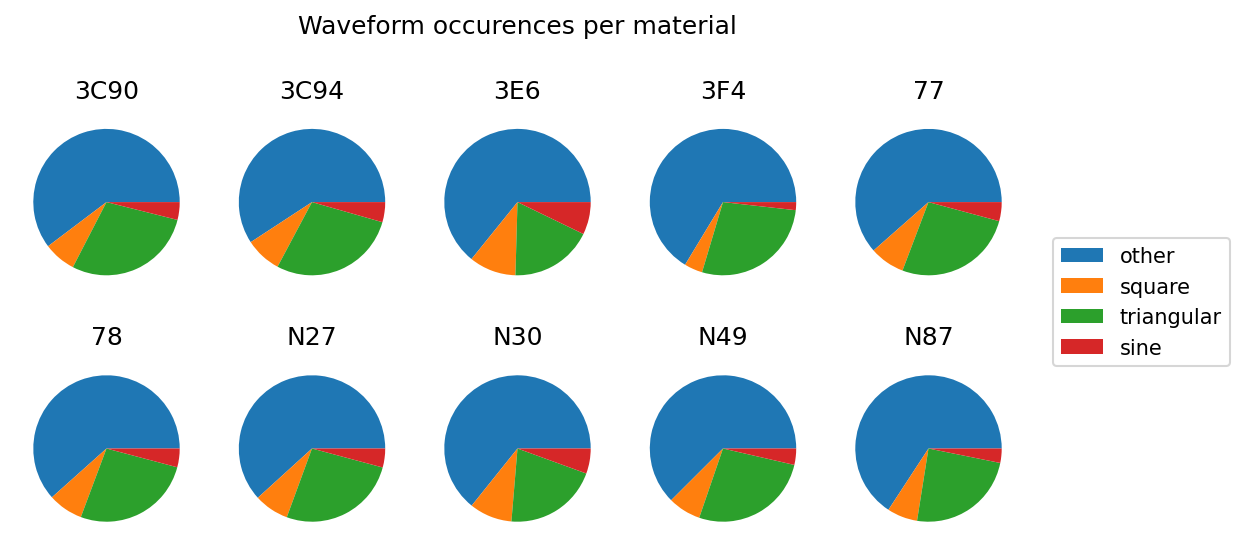

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):

    counts_per_waveform = mat_df['waveform'].value_counts().sort_index()
    ax.pie(counts_per_waveform.to_numpy().ravel())
    ax.set_title("Waveform occurences")    
    ax.set_title(mat_lbl)

fig.legend(labels=template_lbls, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Waveform occurences per material")
fig.tight_layout()

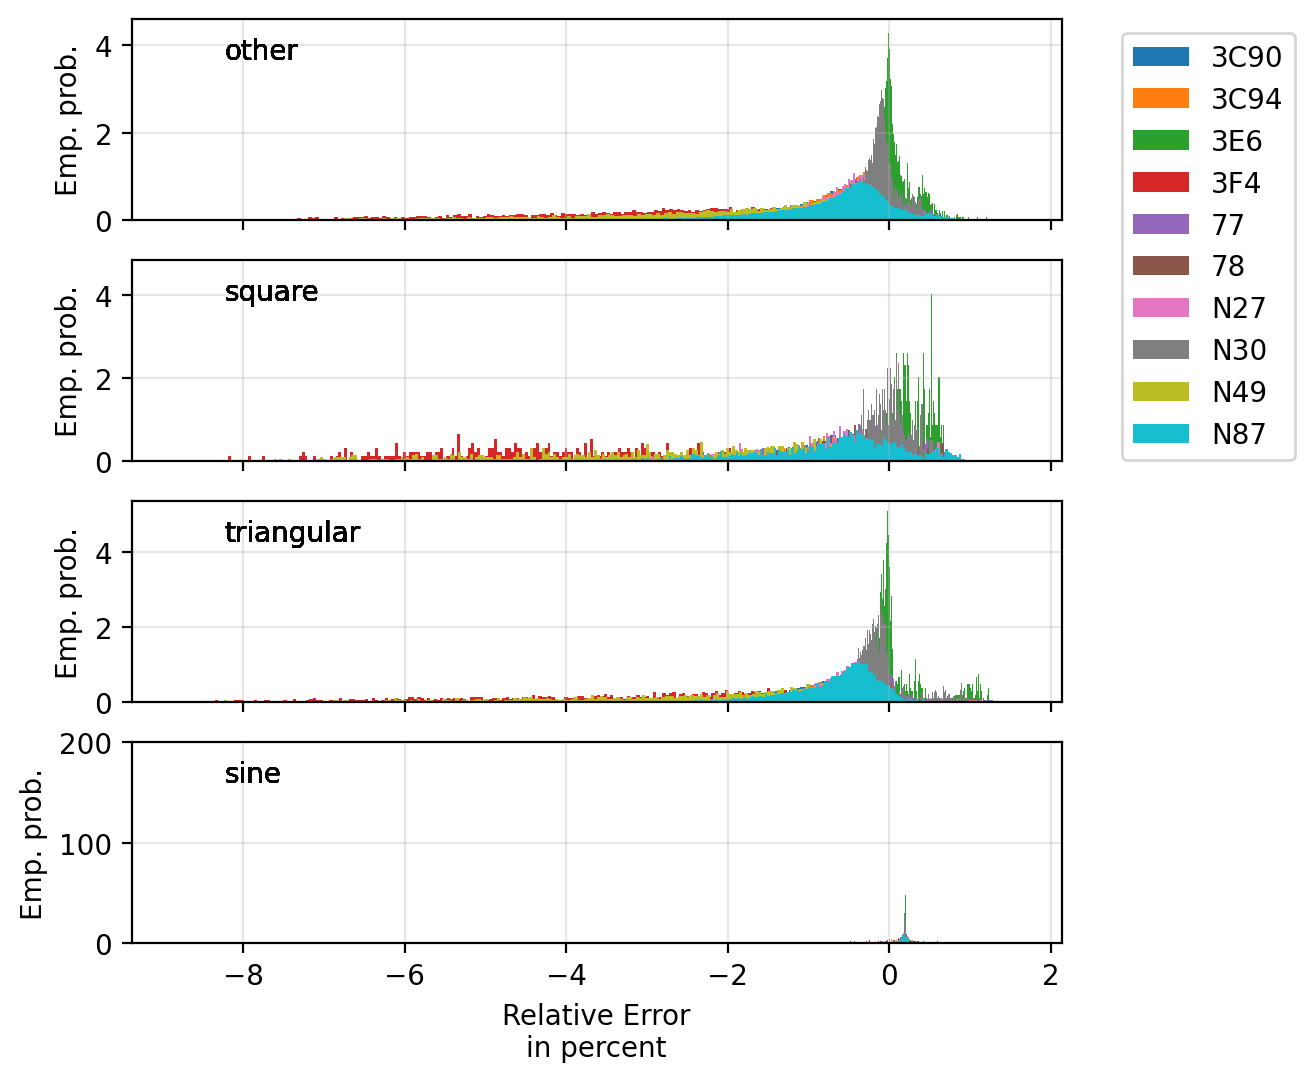

In [27]:
# computed area of the B-H polygon - analysis
fig, axes = plt.subplots(len(template_lbls), 1, sharex=True, sharey=False, dpi=200, figsize=(6, 6))
#plt.figure(dpi=200)

ds["computed_bh_area"] = get_bh_integral(ds)
for mat_name, mat_df in ds.groupby("material"):
    for ax, (mat_lbl, mat_wf_df) in zip(axes.flatten(), mat_df.groupby("waveform")):    
        calc_error = ( mat_wf_df.computed_bh_area - mat_wf_df.ploss) / mat_wf_df.ploss
        ax.hist(calc_error*100, bins=200, density=True, label=mat_name)
        ax.text(0.1, 0.8, s=template_lbls[int(mat_lbl)], transform=ax.transAxes )
        if ax == axes[3]:
            ax.set_xlabel("Relative Error\nin percent")
        ax.set_ylabel("Emp. prob.")
axes[3].set_ylim(0, 200)
axes[0].legend(bbox_to_anchor=(1.05, 1, 0, 0))
# fig.tight_layout()

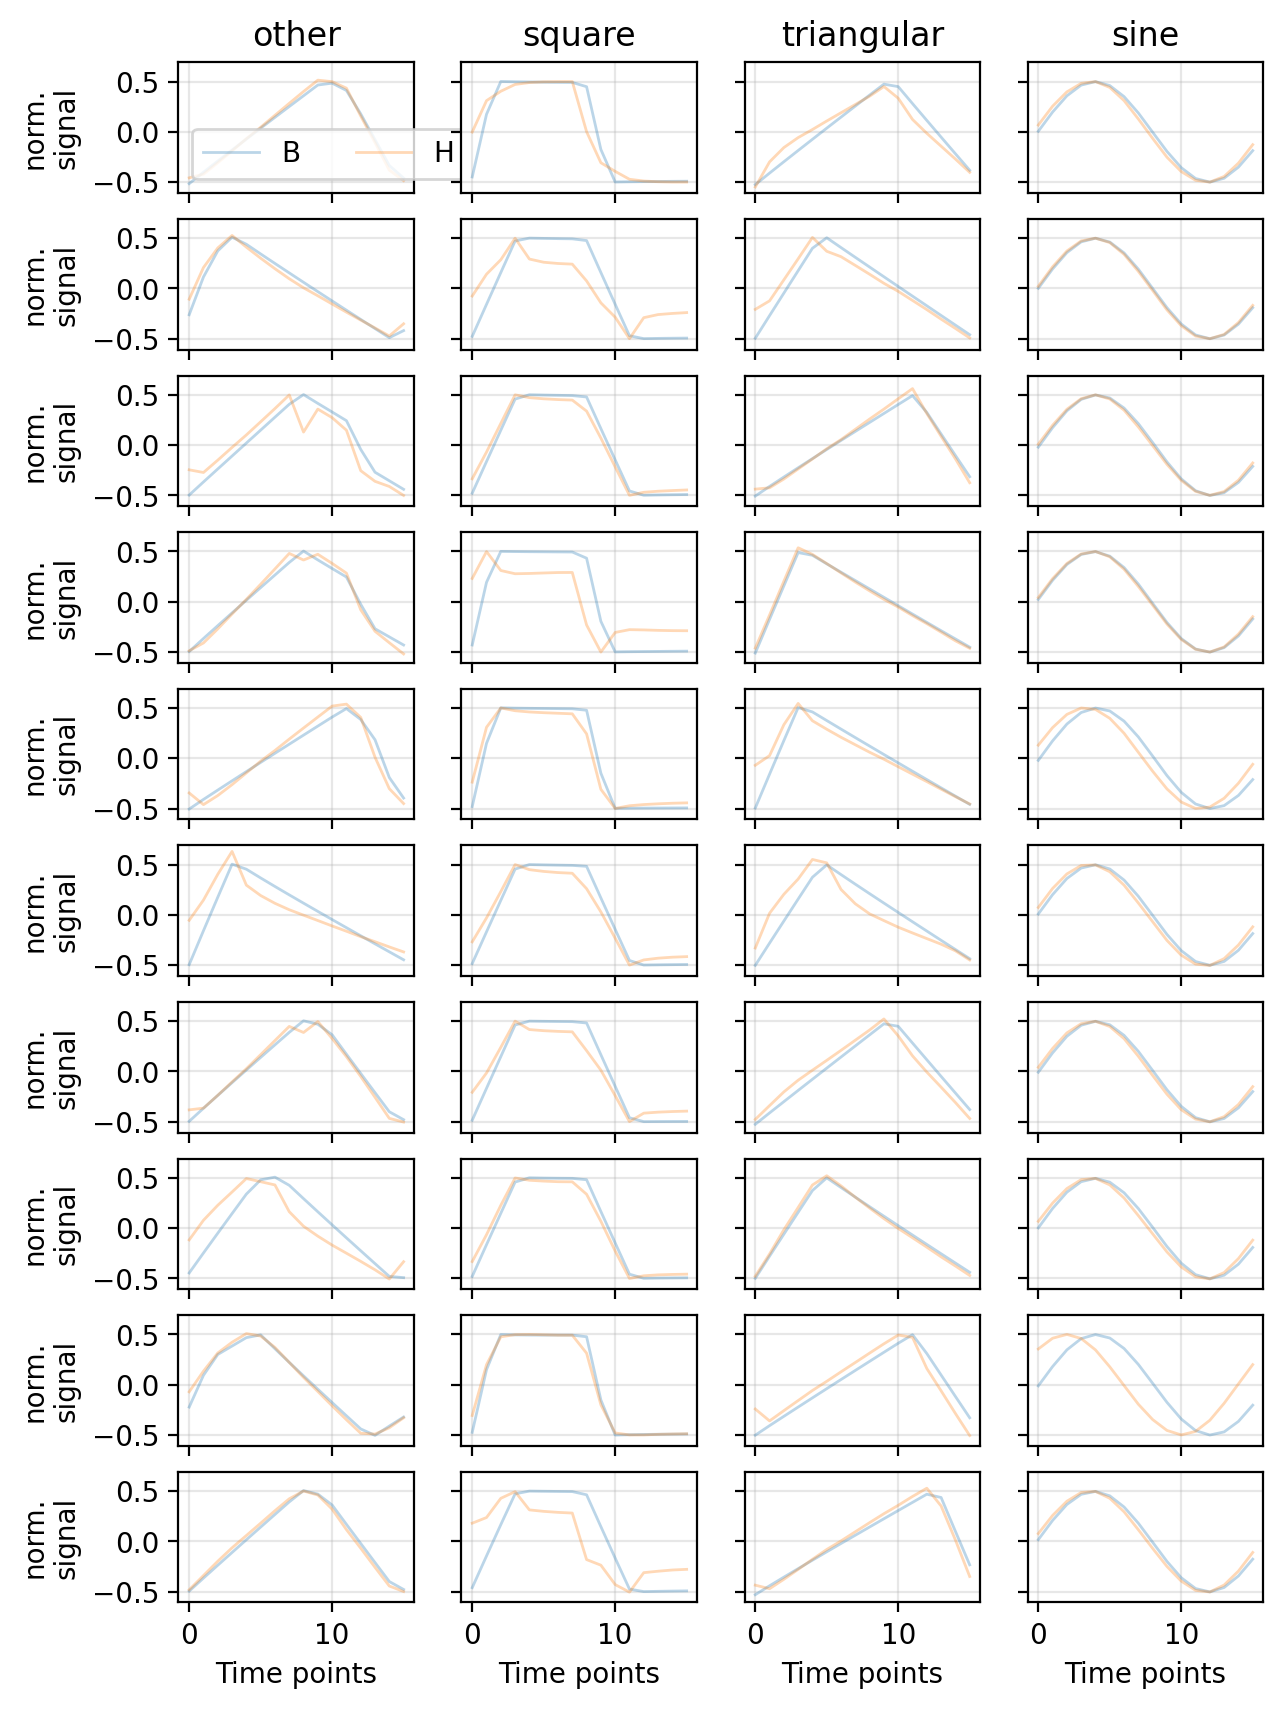

In [28]:
# some examples per waveform

fig, axes = plt.subplots(10, len(template_lbls), dpi=200, figsize=(7, 10), sharex=True, sharey=True)

for wav_i, wav_df in ds.groupby("waveform"):
    for i, j in zip(range(10), np.random.choice(np.arange(len(wav_df)), 10, replace=False)):
        b = 1000*wav_df.iloc[j, :].loc[[f"B_t_{t}" for t in range(0, 1024, 64)]].to_numpy()
        b /= b.max() - b.min()
        axes[i, wav_i].plot(b, alpha=0.3, lw=1.0, label='B')
        h = wav_df.iloc[j, :].loc[[f"H_t_{t}" for t in range(0, 1024, 64)]].to_numpy()
        h /= h.max() - h.min()
        axes[i, wav_i].plot(h, alpha=0.3, lw=1.0, label='H')
        if wav_i == 0 and i == 0:
            axes[i, wav_i].legend(ncols=2)
for i in range(10):
    axes[i, 0].set_ylabel("norm.\nsignal")
for ax in axes[-1, :]:
    ax.set_xlabel("Time points")
for i, lbl in enumerate(template_lbls):
    axes[0, i].set_title(lbl)

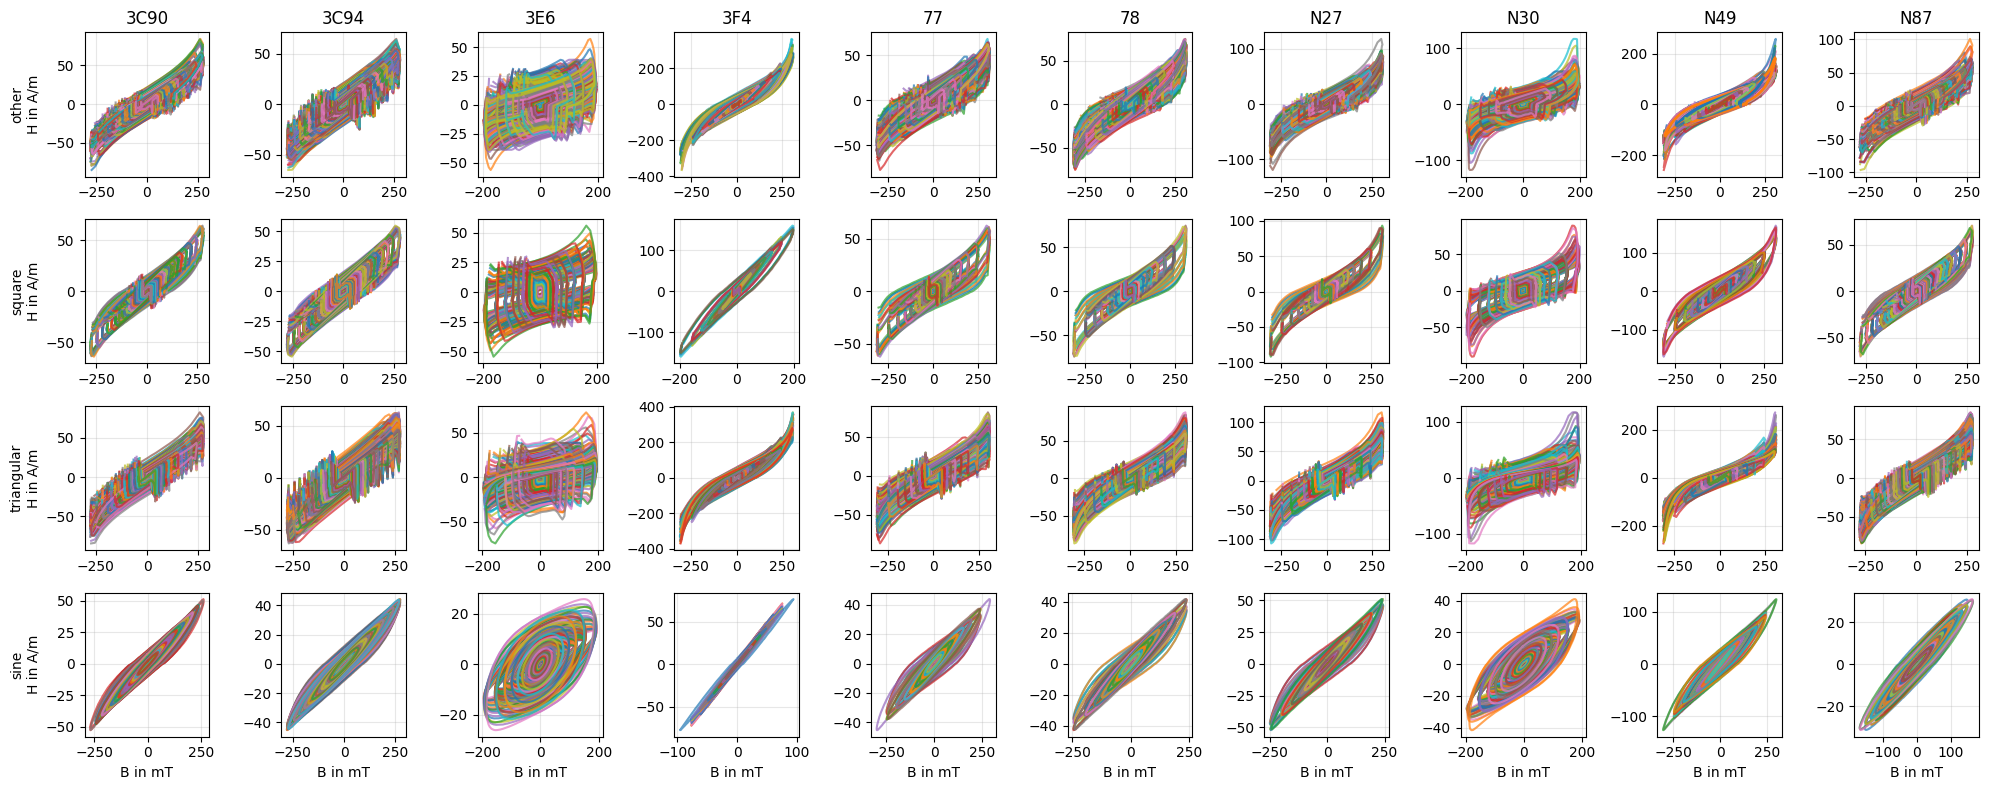

In [29]:
# B-H polygon per material and per waveform
fig, axes = plt.subplots(nrows=len(template_lbls), ncols=10, dpi=100, sharex=False, sharey=False, figsize=(20, 8))
mat_lbls = ds.material.unique().tolist()
for (mat_lbl, wav_lbl), df_ in ds.groupby(["material", 'waveform']):
    b, h = df_.loc[:, [f"B_t_{k}" for k in range(0,1024, 4)]].to_numpy(), df_.loc[:, [f"H_t_{k}" for k in range(0,1024, 4)]].to_numpy()
    col_i = mat_lbls.index(mat_lbl)
    axes[wav_lbl, col_i].plot(b.T*1000, h.T, alpha=.7)
    
for ax, wav_lbl in zip(axes[:, 0], template_lbls):
    ax.set_ylabel(f"{wav_lbl}\nH in A/m")
for ax, m in zip(axes[0, :], mat_lbls):
    ax.set_title(m)
for ax in axes[-1, :]:
    ax.set_xlabel("B in mT")
fig.tight_layout()

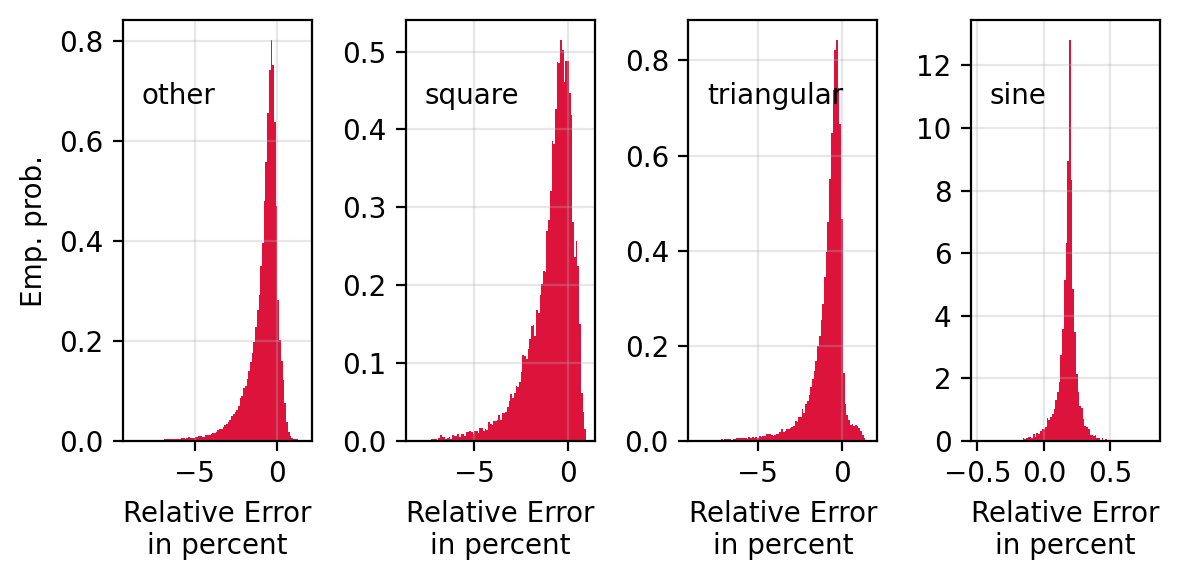

In [30]:
# computed area of the B-H polygon - analysis
fig, axes = plt.subplots(1, len(template_lbls), sharex=False, sharey=False, dpi=200, figsize=(6, 3))
#plt.figure(dpi=200)

ds["computed_bh_area"] = get_bh_integral(ds)
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("waveform")):    
    calc_error = ( mat_df.computed_bh_area - mat_df.ploss) / mat_df.ploss
    ax.hist(calc_error*100 , color='crimson', bins=100, density=True)
    ax.text(0.1, 0.8, s=template_lbls[int(mat_lbl)], transform=ax.transAxes )
    if ax == axes[0]:
        ax.set_ylabel("Emp. prob.")
    ax.set_xlabel("Relative Error\nin percent")
fig.tight_layout()

Text(0, 0.5, 'Rel. Error in percent')

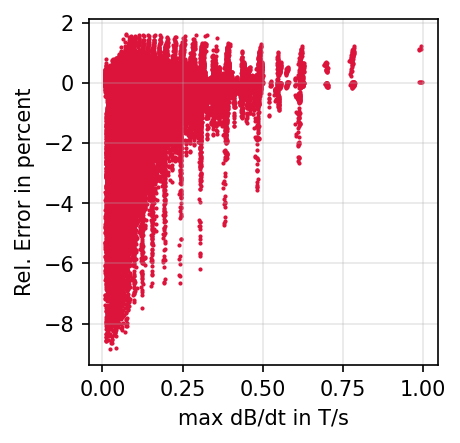

In [31]:
#ds["waveform"] = cls_estimate
ds["computed_bh_area"] = get_bh_integral(ds)
ds["max_dBdt"] = np.abs(full_b[:, 1:] - full_b[:, :-1]).max(axis=1)*ds.freq/1024
ds["ploss_rel_error"] = ( ds.computed_bh_area - ds.ploss) / ds.ploss

plt.figure(dpi=150, figsize=(3,3))
plt.scatter(ds.max_dBdt, ds.ploss_rel_error*100, s=1.0, color='crimson')
plt.xlabel("max dB/dt in T/s")
plt.ylabel("Rel. Error in percent")

Text(0, 0.5, 'Rel. Error in percent')

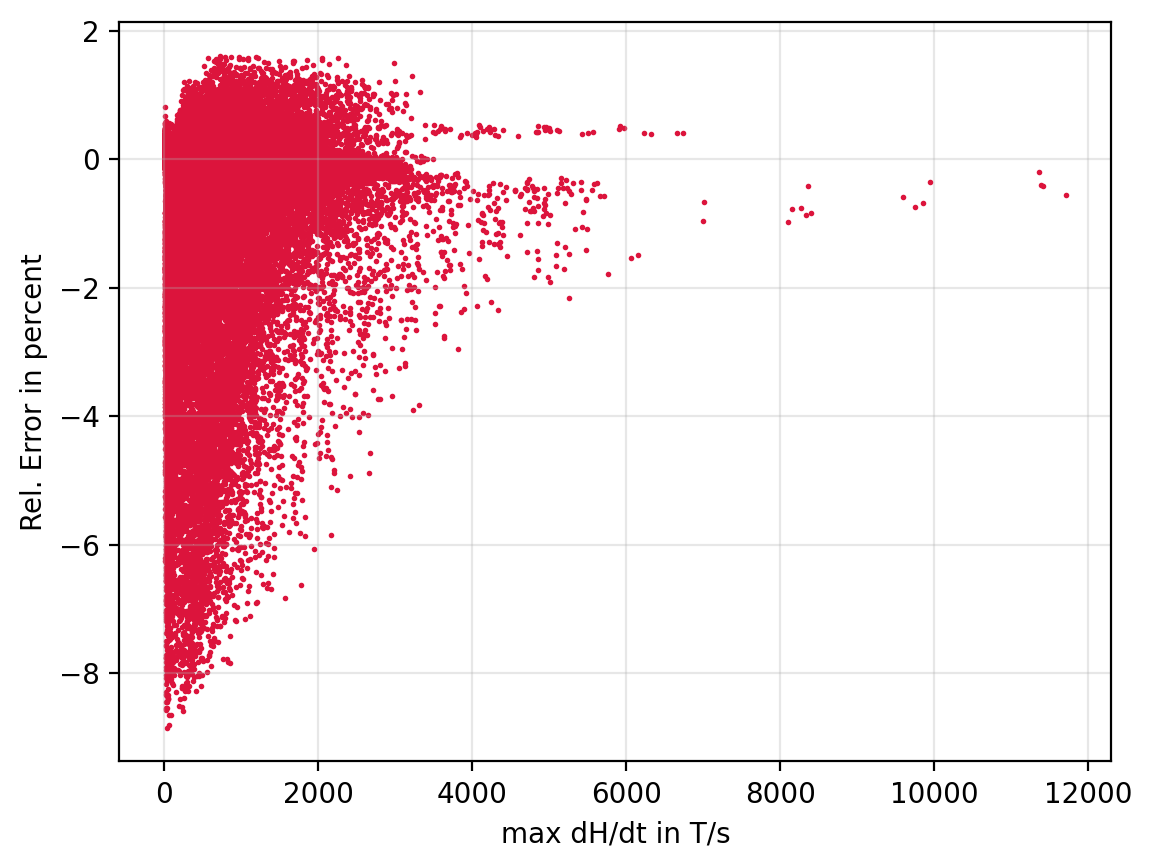

In [32]:
plt.figure(dpi=200)
plt.scatter(np.abs(full_h[:, 1:] - full_h[:, :-1]).max(axis=1)*ds.freq/1024, ds.ploss_rel_error*100, s=1.0, color='crimson')
plt.xlabel("max dH/dt in T/s")
plt.ylabel("Rel. Error in percent")

## Visualize Relative Error Ploss vs. Integral B-H

In [33]:

ds["computed_bh_area"] = get_bh_integral(ds)
ds.loc[:, ['ploss', 'computed_bh_area']]

ploss  computed_bh_area
0         2319.444340       2325.001157
1         3191.235893       3200.311871
2         4341.086142       4347.819841
3         5795.359190       5804.991081
4         7813.691725       7828.213567
...               ...               ...
186742   68121.464932      68725.240814
186743   85924.743654      86664.833451
186744  108411.839417     109395.273075
186745  135853.384296     137036.313023
186746  171849.522231     173343.234393

[186747 rows x 2 columns]

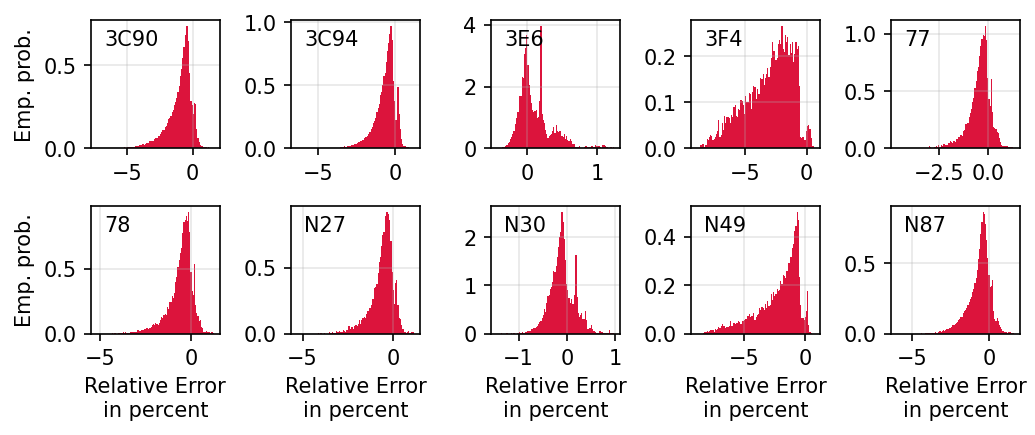

In [34]:
fig, axes = plt.subplots(2, 5, sharex=False, sharey=False, dpi=150, figsize=(7, 3))
#plt.figure(dpi=200)

for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):    
    calc_error = ( mat_df.computed_bh_area - mat_df.ploss) / mat_df.ploss
    ax.hist(calc_error*100 , color='crimson', bins=100, density=True)
    ax.text(0.1, 0.8, s=mat_lbl, transform=ax.transAxes )
    if ax in axes[:, 0]:
        ax.set_ylabel("Emp. prob.")
    if ax in axes[1, :]:
        ax.set_xlabel("Relative Error\nin percent")
fig.tight_layout()

Text(0, 0.5, 'Relative error in percent')

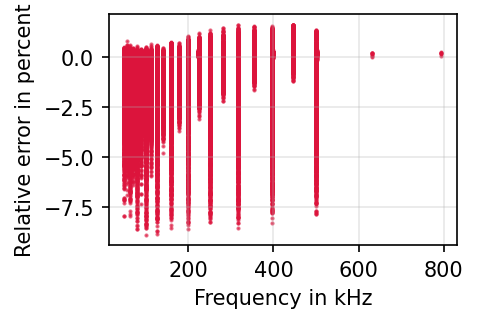

In [35]:
plt.figure(dpi=150, figsize=(3, 2))
plt.scatter(ds.freq*1e-3, ( ds.computed_bh_area - ds.ploss) / ds.ploss*100, color='crimson', s=1, alpha=0.6)
plt.xlabel("Frequency in kHz")
plt.ylabel("Relative error in percent")

Text(0, 0.5, 'Relative error in percent')

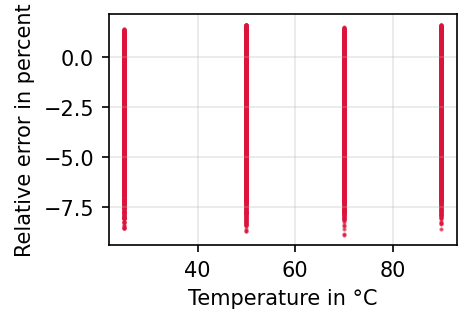

In [36]:
plt.figure(dpi=150, figsize=(3, 2))
plt.scatter(ds.temp, ( ds.computed_bh_area - ds.ploss)/ ds.ploss*100, color='crimson', s=1, alpha=0.6)
plt.xlabel("Temperature in °C")
plt.ylabel("Relative error in percent")

## How hard is predicting the initial/terminal H value?
As a pre analysis for differential equation based methods

Text(0.5, 1.0, 'Initial value scatter')

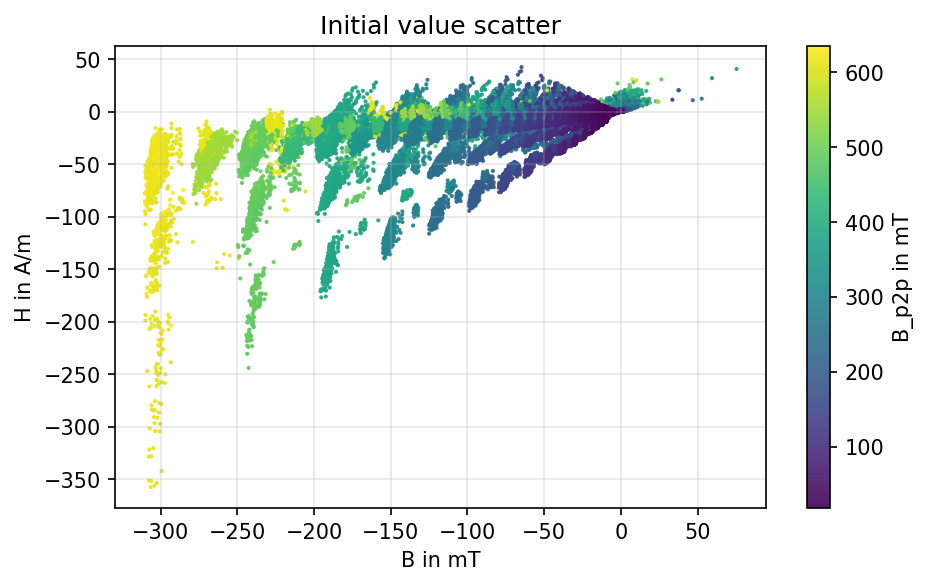

In [37]:
# initial values
plt.figure(dpi=150, figsize=(7,4))
plt.scatter(full_b[:, 0]*1000, full_h[:, 0], s=1.0, alpha=0.9, c=1000*(full_b.max(axis=1) - full_b.min(axis=1)), cmap='viridis')
cb = plt.colorbar()
cb.set_label('B_p2p in mT')
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Initial value scatter')

Text(0.5, 1.0, 'Initial value scatter')

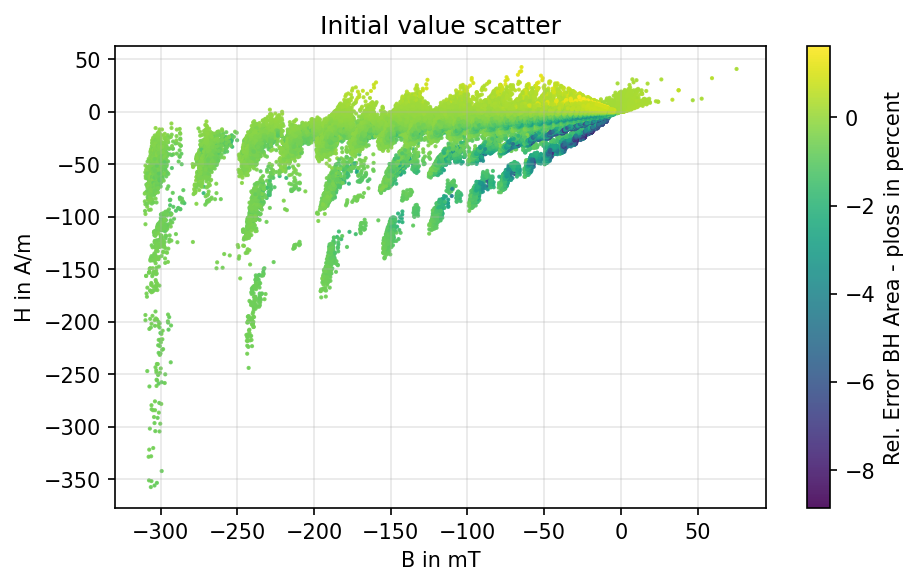

In [38]:
# initial values
plt.figure(dpi=150, figsize=(7,4))
plt.scatter(full_b[:, 0]*1000, full_h[:, 0], s=1.0, alpha=0.9, c=(ds.computed_bh_area - ds.ploss) / ds.ploss*100, cmap='viridis')
cb = plt.colorbar()
cb.set_label('Rel. Error BH Area - ploss in percent')
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Initial value scatter')

no strong patterns are evident for the initial H value given the initial B with respect to peak2peak B value in the period or the relative error of the approximation of the power loss through the BH polygon area.

Text(0.5, 1.0, 'Terminal value scatter')

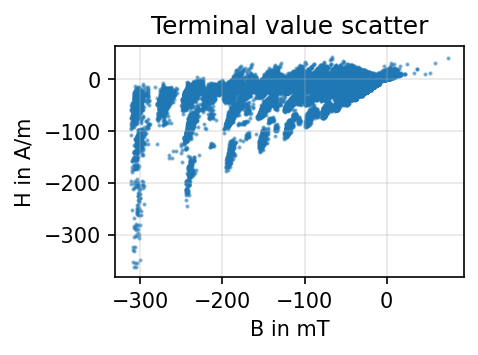

In [39]:
# terminal values
plt.figure(dpi=150, figsize=(3,2))
plt.scatter(full_b[:, -1]*1000, full_h[:, -1], s=1.0, alpha=0.5)
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Terminal value scatter')

terminal values seem to be close to initial values. Check below

Text(0, 0.5, 'Empirical Probability')

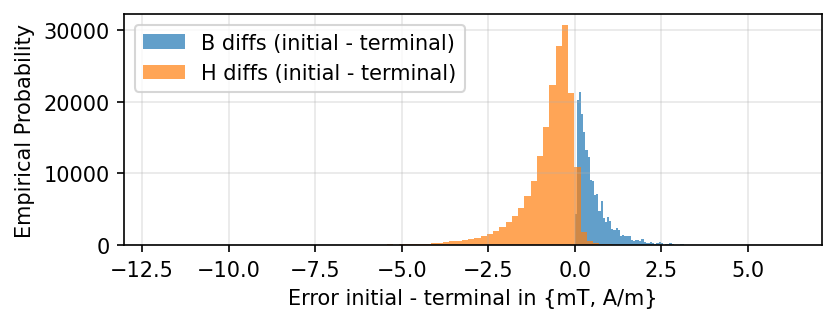

In [40]:
# is the initial value always the terminal value?
plt.figure(dpi=150, figsize=(6,2))
plt.hist(1000*(full_b[:, 0] - full_b[:, -1]), label='B diffs (initial - terminal)', bins=100, alpha=0.7)
plt.hist(full_h[:, 0] - full_h[:, -1], label='H diffs (initial - terminal)', bins=100, alpha=0.7)
plt.legend()
plt.xlabel("Error initial - terminal in {mT, A/m}")
plt.ylabel("Empirical Probability")

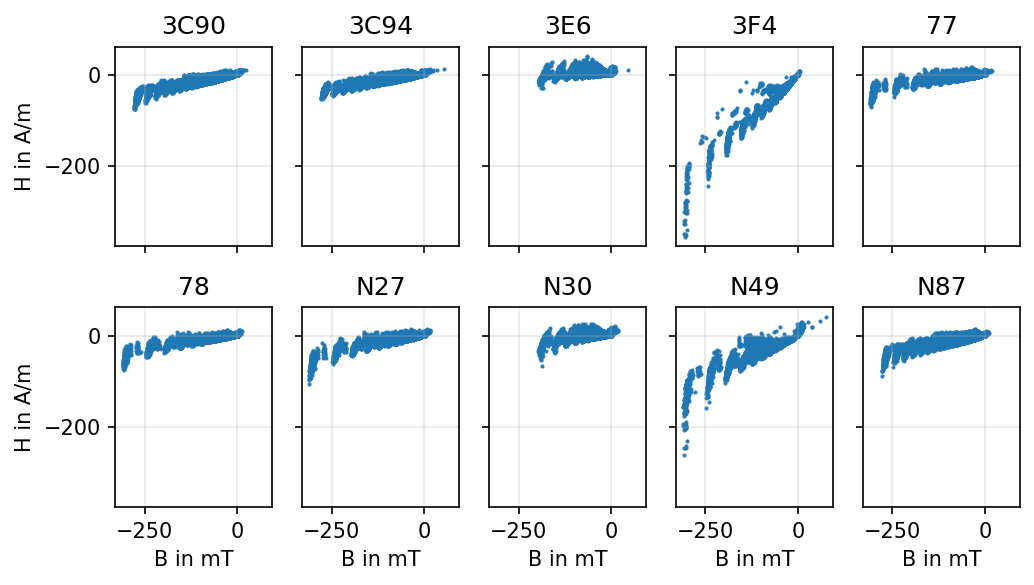

In [41]:
# max H over power loss
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=150, sharex=True, sharey=True, figsize=(7, 4))
for ax, (mat_lbl, mat_df) in zip(axes.flatten(), ds.groupby("material")):
    h = mat_df.loc[:, f"H_t_0"].to_numpy()
    b = 1000*mat_df.loc[:, f"B_t_0"].to_numpy()
    ax.scatter(b, h, alpha=.9, s=1.0)
    
    ax.set_title(mat_lbl)
axes[0, 0].set_ylabel("H in A/m")
axes[1, 0].set_ylabel("H in A/m")
for ax in axes[-1, :]:
    ax.set_xlabel("B in mT")
fig.tight_layout()

Text(0.5, 1.0, 'Initial value scatter per material')

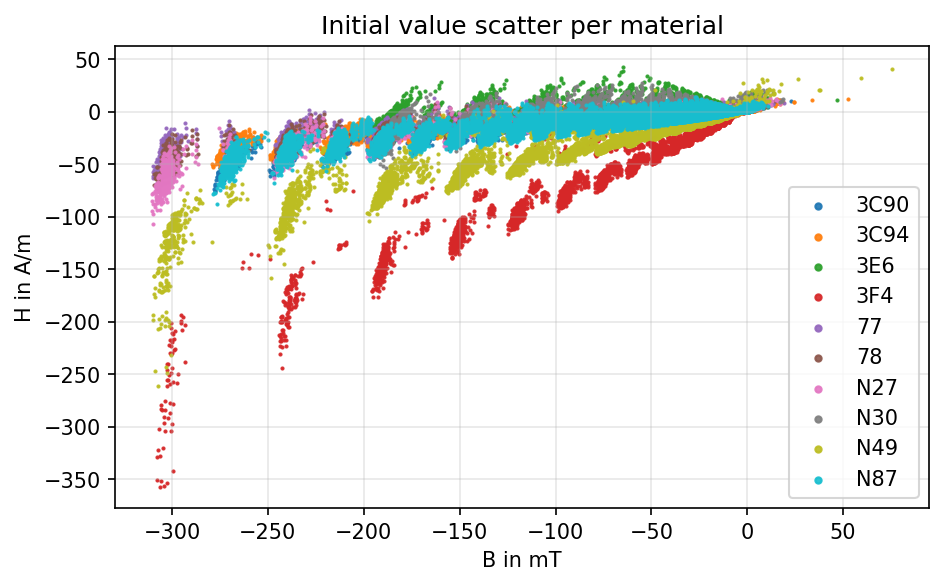

In [42]:
# initial values
plt.figure(dpi=150, figsize=(7,4))
for mat_name, mat_df in ds.groupby("material"):
    b, h = mat_df.loc[:, [f"B_t_0"]].to_numpy(), mat_df.loc[:, [f"H_t_0"]].to_numpy()
    plt.scatter(b*1000, h, s=1.0, alpha=0.9, label=mat_name)
plt.legend(markerscale=3)
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Initial value scatter per material')

Text(0.5, 1.0, 'Initial value scatter per waveform')

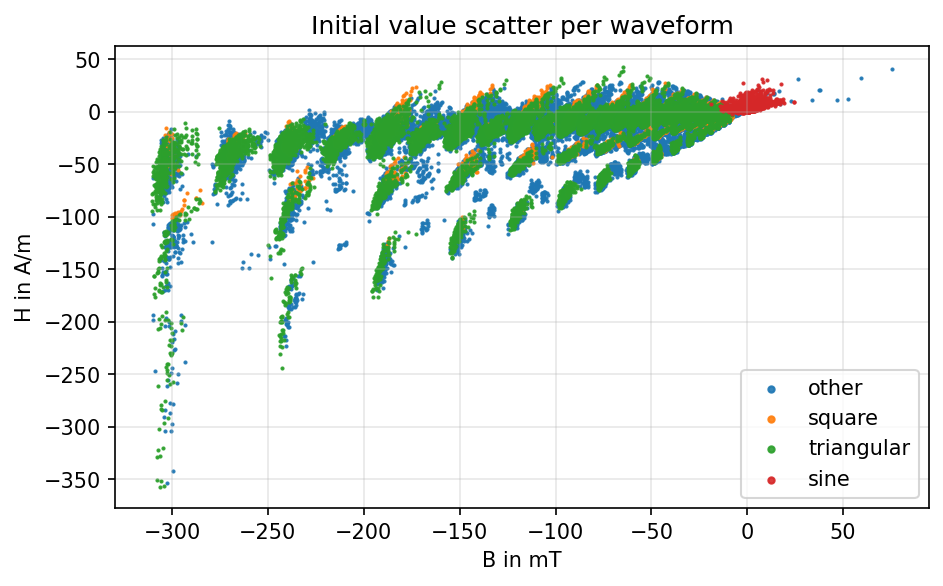

In [43]:
# initial values per signal waveform
plt.figure(dpi=150, figsize=(7,4))
for wav, mat_df in ds.groupby("waveform"):
    b, h = mat_df.loc[:, [f"B_t_0"]].to_numpy(), mat_df.loc[:, [f"H_t_0"]].to_numpy()
    plt.scatter(b*1000, h, s=1.0, alpha=0.9, label=template_lbls[wav])
plt.legend(markerscale=3)
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Initial value scatter per waveform')

In [44]:
# analyze specific blobs
op1 = ds.query("material == '3F4' and -0.250 < B_t_0 < -0.200 and -250 < H_t_0 < 100")
op2 = ds.query("material == '3F4' and -0.200 < B_t_0 < -0.170 and -200 < H_t_0 < 100")

Text(0.5, 1.0, 'Initial value scatter for two blobs')

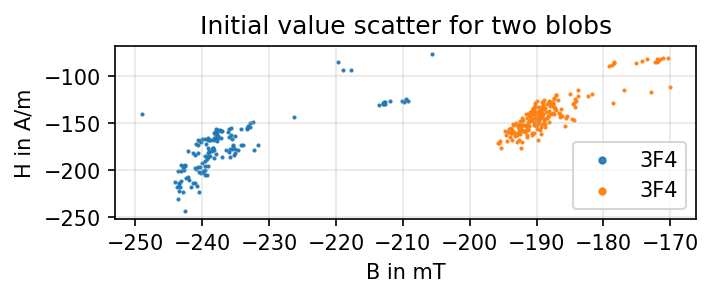

In [45]:
# initial values
plt.figure(dpi=150, figsize=(5,1.5))
b, h = op1.loc[:, [f"B_t_0"]].to_numpy(), op1.loc[:, [f"H_t_0"]].to_numpy()
plt.scatter(b*1000, h, s=1.0, alpha=0.9, label=op1.material.unique()[0])
b, h = op2.loc[:, [f"B_t_0"]].to_numpy(), op2.loc[:, [f"H_t_0"]].to_numpy()
plt.scatter(b*1000, h, s=1.0, alpha=0.9, label=op2.material.unique()[0])
plt.legend(markerscale=3)
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Initial value scatter for two blobs')

Text(0.5, 1.0, 'Initial value scatter for two blobs')

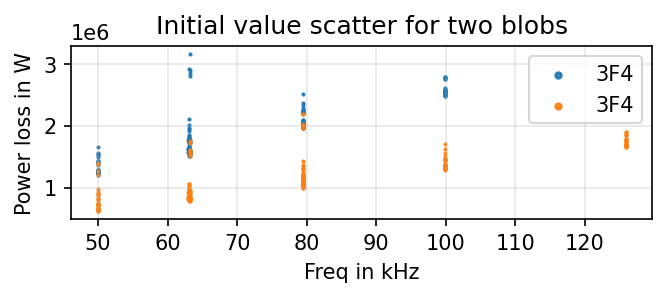

In [46]:
# initial values of 2 ops over freq
plt.figure(dpi=150, figsize=(5,1.5))
freq, h = op1.loc[:, "freq"].to_numpy(), op1.loc[:, "ploss"].to_numpy()
plt.scatter(freq/1000, h, s=1.0, alpha=0.9, label=op1.material.unique()[0])
freq, h = op2.loc[:, "freq"].to_numpy(), op2.loc[:, "ploss"].to_numpy()
plt.scatter(freq/1000, h, s=1.0, alpha=0.9, label=op2.material.unique()[0])
plt.legend(markerscale=3)
plt.xlabel('Freq in kHz')
plt.ylabel("Power loss in W")
plt.title('Initial value scatter for two blobs')

Text(0.5, 1.0, 'Initial value scatter for two blobs')

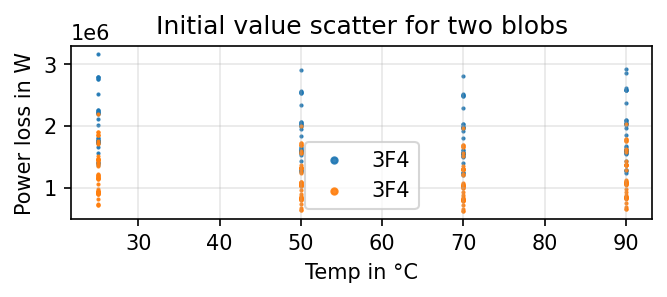

In [47]:
# initial values of 2 ops over temp
plt.figure(dpi=150, figsize=(5,1.5))
te, h = op1.loc[:, "temp"].to_numpy(), op1.loc[:, "ploss"].to_numpy()
plt.scatter(te, h, s=1.0, alpha=0.9, label=op1.material.unique()[0])
te, h = op2.loc[:, "temp"].to_numpy(), op2.loc[:, "ploss"].to_numpy()
plt.scatter(te, h, s=1.0, alpha=0.9, label=op2.material.unique()[0])
plt.legend(markerscale=3)
plt.xlabel('Temp in °C')
plt.ylabel("Power loss in W")
plt.title('Initial value scatter for two blobs')

it is still open how these blobs appear

# How hard is predicting the h value for B-max?

In [48]:
np.argmax(full_b, axis=1).shape

(186747,)

Text(0.5, 1.0, 'Bmax to H value scatter')

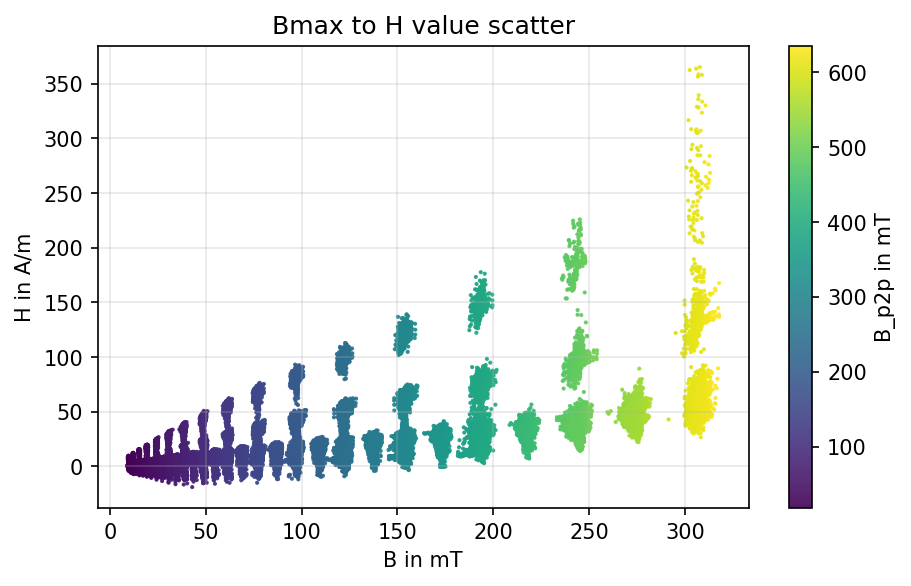

In [49]:
# initial values
plt.figure(dpi=150, figsize=(7,4))
x = full_b.max(axis=1)*1000
y = full_h[np.arange(len(full_h)), np.argmax(full_b, axis=1)]
plt.scatter(x, y, s=1.0, alpha=0.9, c=1000*(full_b.max(axis=1) - full_b.min(axis=1)), cmap='viridis')
cb = plt.colorbar()
cb.set_label('B_p2p in mT')
plt.xlabel('B in mT')
plt.ylabel("H in A/m")
plt.title('Bmax to H value scatter')

first of june 2023 - discussion

possible equations to base on:
- Erika Stenglein (eq. based on pre-states, regression model to power losses)
- Maxwell doesnt give hints on how to obtain H from B
- differential equation would be preferrable (still open)
-- probably existing in material literature (molecular level)
- promising feature could be the deviation from a perfect sinusoidal waveform
- Check whether the phase difference between B and H increases for higher B-peak2peak
